In [51]:
# Imports
import csv
import matplotlib.pyplot as plt
import math

In [52]:
### Changeable Variables

In [53]:
# File Names
spec_file = 'cs-137_spectrum.csv'
xs_file = 'cevns_xs_cs-137.csv'

# Constants
N_A = 6.0221408*10**(23)  #atoms/mole

# Source variables = 1g of Cs-137
Q = 1176
source_amu = 136.907084  
half_life = 30.08*365*86400    #seconds
source_mass = 100   #grams
distance = 1    #m

# Detector Variables = 1 kg Zinc Superconductor in a cube
det_num = 1000
det_mass = 1000    #grams
det_density = 7.14   #g/cm^3
det_amu = 72
A = 64*0.486 + 66*0.279 + 67*0.041 + 68*0.188
t = 86400

In [54]:
### Download Data

In [55]:
# Read Spectrum CSV File
energies_spec = []
counts = []

with open(spec_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies_spec.append(float(row[0]))
        counts.append(float(row[1]))

In [56]:
# Read XS csv file
energies = []
xs = []

with open(xs_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies.append(float(row[0]))
        xs.append(float(row[1]))

In [57]:
### Calculating Needed Variables

In [58]:
# Calculate Source Activity per Gram
N_0 = source_mass * N_A / source_amu 
dec_const = math.log(2)/half_life

source_flux = N_0 * dec_const  #bequerels
print('Source Activity = ' + str(source_flux) + ' Bq')

Source Activity = 321414900947109.9 Bq


In [59]:
# Calculate Oscillation Probability
theta = 0.086
delta = 2.4*10**(-3)   #eV

def osc_prob(E, r):
    P = 1-0.086*(math.sin(1.27*r*delta/E))**2
    return P

In [60]:
### Calculate Reaction Rate as a Function of Energy

In [61]:
# Calculate Interaction Probability
int_prob = []

for i in range(len(energies)) :
    #P = osc_prob(energies[i], distance)
    P=1
    R = source_flux*xs[i]*10**(-4)*N_A*det_mass*P/(A*4*math.pi*distance**2)
    int_prob.append(R*det_num)

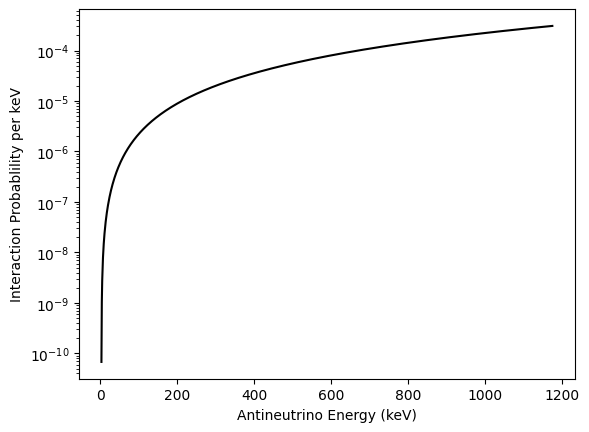

In [62]:
# Graphing Interaction Probability
kev = []
for e in energies :
    kev.append(e*10**(-3))
    
plt.plot(kev, int_prob, color='black')
plt.xlabel('Antineutrino Energy (keV)')
plt.ylabel('Interaction Probablility per keV')
plt.yscale('log')
plt.savefig('Cs-137_RR.png')

In [63]:
# Calculating Reaction Rate
for i in range(len(counts), 0) :
    if energies_spec[i] not in energies:
        counts.pop(i)

react_rate = []
for i in range(len(energies)) :
    x = int_prob[i]*counts[i]
    react_rate.append(x*t)

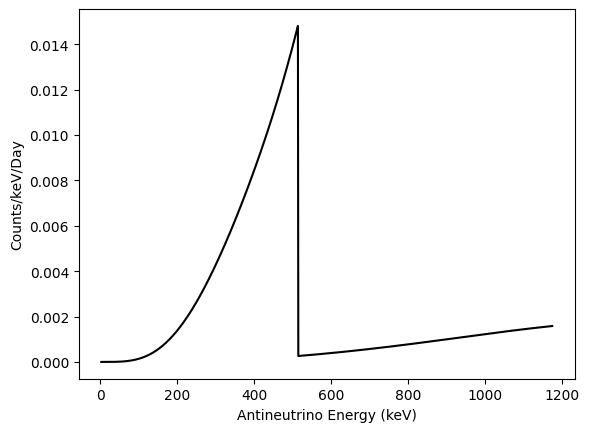

In [64]:
# Graphing Reaction Rate
plt.plot(kev, rate_spec, color='black')
plt.xlabel('Antineutrino Energy (keV)')
plt.ylabel('Counts/keV/Day')
plt.savefig('Cs-137_counts.png')

In [65]:
print('Total Counts: ' + str(sum(rate_spec)) + ' per ' + str(t) + ' seconds')

Total Counts: 2.8594197155741305 per 86400 seconds
